In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/signapoop/Desktop/fyp-graph-clustering'

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.manifold import TSNE

from core.DimReduction import DimReduction

In [3]:
STOP_WORDS = nltk.corpus.stopwords.words()

In [4]:
filename = '/Users/signapoop/Desktop/data/wiki-news-300d-1M.vec'
max_samples = 1000
labels = []
i = 0
X = np.zeros((max_samples, 300))
with open(filename, "r") as f:
    for line in f:
        if i == max_samples: break
        all_features = line.split(' ')
        label = all_features[0]
        if len(all_features) != 301 or not label.isalpha() or label.lower() in STOP_WORDS:
            continue
        
        labels.append(label)
        X[i] = np.array([float(x) for x in all_features[1:]])
        i += 1

In [5]:
X

array([[ 4.580e-02, -3.620e-02,  1.560e-02, ...,  1.561e-01,  1.567e-01,
         3.010e-02],
       [ 5.520e-02, -1.810e-02, -5.610e-02, ...,  2.884e-01,  8.770e-02,
        -7.010e-02],
       [-7.020e-02,  2.890e-02,  4.130e-02, ...,  1.881e-01,  8.690e-02,
         1.251e-01],
       ...,
       [ 7.440e-02, -1.690e-02, -1.170e-02, ...,  7.480e-02, -3.750e-02,
        -2.050e-02],
       [-8.690e-02, -1.247e-01,  1.679e-01, ...,  8.980e-02,  2.240e-02,
        -4.140e-02],
       [ 4.400e-03, -2.000e-04,  2.340e-02, ..., -3.270e-02,  1.149e-01,
        -4.920e-02]])

In [6]:
X.shape

(1000, 300)

In [7]:
# dim_red = DimReduction(2)
# X_emb = dim_red.fit_transform(X, 'tsne')
embedder = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
X_emb = embedder.fit_transform(X)

In [9]:
X_emb_2 = X_emb[:500]
labels_2 = labels[:500]

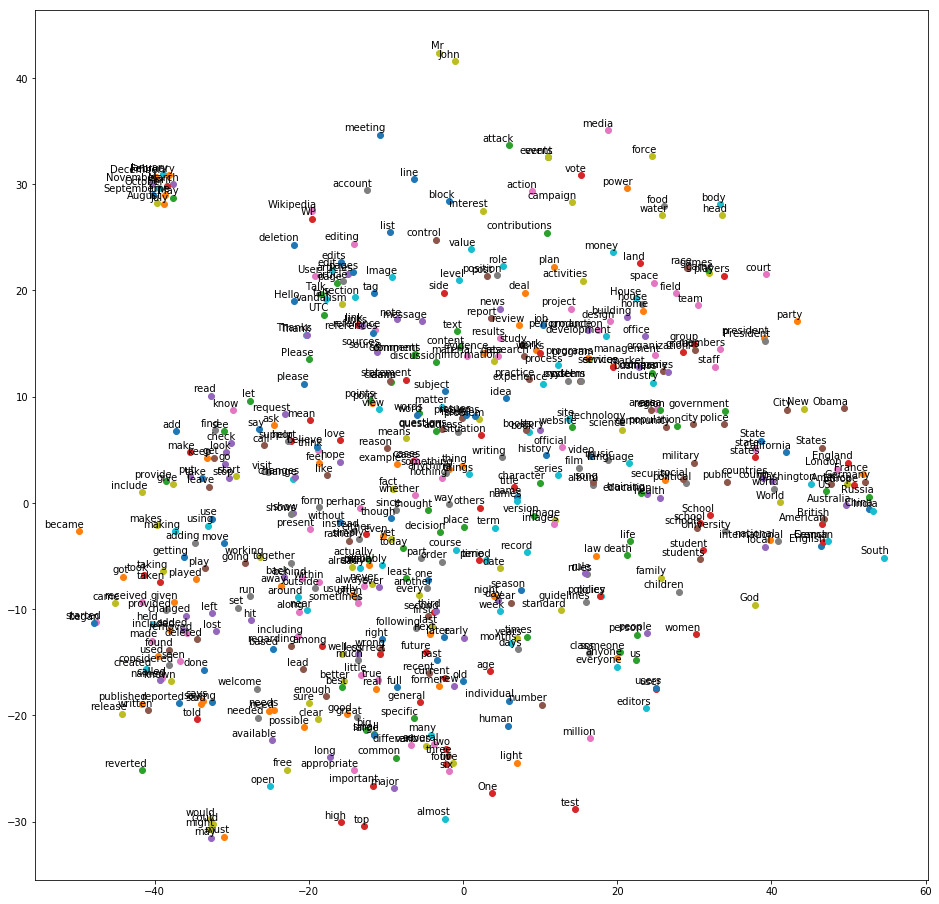

In [10]:
plt.figure(figsize=(16, 16)) 
for i in range(X_emb_2.shape[0]):
    plt.scatter(X_emb_2[i,0],X_emb_2[i,1])
    plt.annotate(labels_2[i],
                 xy=(X_emb_2[i,0], X_emb_2[i,1]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()